# Classifiers Capstone

1. Objective - build a classifier to classify images of handwritten digits.  
2. Deliverables:
    * A `.pkl` containing your model's fitted parameters. 
    * An IPython/Jupyter notebook with a Model class.  
    * Some driver code that loads your model's parameters evaluates its performance on a Test-set.  
3. Evaluation criteria - I will use a set of test data (that you won't be given for training) to see who built the best model.  The model with the highest `accuracy` on this test set.  

In [ ]:
class BaseModel:
    def name(self):
        return 'Base Model'
    
    def predict(self, x):
        # always predict background
        return 0
    
    # calculates the performance of the model
    def test(self, XY_test, display=True):
        ses = []
        tp = 0.
        tn = 0.
        fp = 0.
        fn = 0.
        for x, y in XY_test:
            pred = self.predict(x)
            ses.append(y**2.+pred**2.)
            if y == 1:
                if pred >= 0.5:
                    tp += 1
                else:
                    fn += 1
            else:
                if pred < 0.5:
                    tn += 1
                else:
                    fp += 1
        try:
            accuracy = (tp+tn)/(tp+tn+fp+fn)
        except:
            accuracy = np.nan
        try:
            recall = tp/(tp+fn)
        except:
            recall = np.nan
        try:
            precision = tp/(tp+fp)
        except:
            precision = np.nan
            
        results = {'mse': np.mean(ses), 'accuracy': accuracy, 'recall': recall, 'precision': precision, 'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn}
        if display:
            print "Fitted %s Results" % self.name()
            print "Accuracy: %0.2f%%" % (results['accuracy']*100.)
            print "Precision: %0.2f%%" % (results['precision']*100.)
            print "Recall: %0.2f%%" % (results['recall']*100.)
        return results


In [ ]:
class YourModel(BaseModel):
    def __init__(self):
        # Initialize it!
    
    def predict(self):
        # need to implement this
        
    def save(self, filename, save_loc=None):
        # need to implement this.
        
    def load(self, file_loc):
        # need to implement this.
    
    def name(self):
        return 'My Cool Model'

# Data Loading

In [1]:
import urllib
import pickle
import numpy as np

In [2]:
result = urllib.urlretrieve("https://s3.amazonaws.com/hudl-hadoop/classifiers101/digits_data.pkl", "digits_data.pkl")
f = open('digits_data.pkl', 'r')
raw_data = pickle.load(f)
f.close()
imgs, labels = zip(*raw_data)

# Displaying the Data

In [3]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

Label: 8


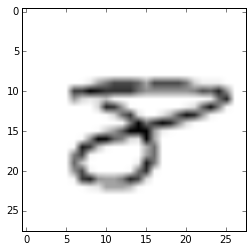

In [4]:
img_data, label = random.choice(raw_data);
print "Label: %i" % label
plt.imshow(img_data.reshape((28,28)), cmap='Greys')